In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dt=pd.read_csv("C:/Users/Sowmya Ganesh/Documents/delivery_time.csv")
dt.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
#Creating copoy of actual data
delivery_data=dt.copy()
print(delivery_data)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


#### Basic Information Check

In [7]:
print(delivery_data.shape)

(21, 2)


In [8]:
print(delivery_data.dtypes)

Delivery Time    float64
Sorting Time       int64
dtype: object


In [9]:
print(delivery_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


In [10]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Exploratory Data Analysis(EDA)

#### To find the correlation between Delivery and Sorting Time

In [11]:
delivery_data[['Delivery Time','Sorting Time']].corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


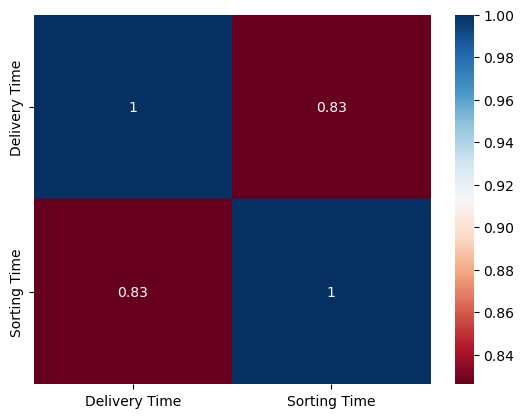

In [15]:
sns.heatmap(delivery_data[['Delivery Time','Sorting Time']].corr(),annot=True,cmap="RdBu",cbar=True)
plt.savefig("Delivery_corr.png",dpi=100)

In [13]:
#From the heat map we can infer there is 
# a strong relation between the columns delivery and sorting.

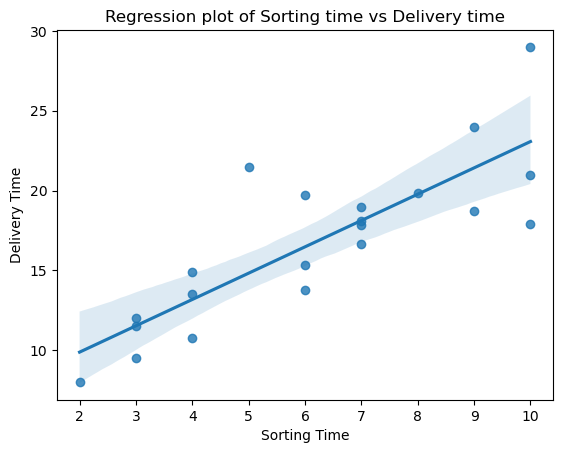

In [18]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=delivery_data)
plt.title('Regression plot of Sorting time vs Delivery time')
plt.savefig("Delivery_Regression.png")

In [ ]:
sns.histplot(x = 'Delivery Time', data = delivery_data, kde=True)

In [ ]:
import scipy.stats as stats
skewness = stats.skew(delivery_data['Delivery Time'])
print(f'Skewness of Delivery Time data is {round(skewness,2)}')

In [ ]:
#The graph shows it is right skewed

In [ ]:
delivery_data.plot(x="Sorting Time",y="Delivery Time",kind="scatter",s=100,grid=True)
plt.savefig("Delivery_scatter.png",dpi=100)

In [ ]:
delivery_data[["Delivery Time","Sorting Time"]].plot(kind='area',legend=True)
plt.savefig("Delivery_area.png",dpi=100)

In [ ]:
# This area graph shows that Sorting time is greater than Delivery time.
# The Delivery time pattern and the Sorting time pattern are almost the same.

In [ ]:
sns.boxplot(x = 'Delivery Time', data= delivery_data)

In [ ]:
#There are no outliners in the data

# Simple Linear Regrression

### Objective - To predict Delivery Time using Sorting Time

In [ ]:
# Here we have X=Sorting Time or Independent Variable
# and y as Delivery Time or Dependent Variable or Target Variable 

## Splitting the train_test_split as 80:20

In [ ]:
y=delivery_data[['Delivery Time']]
y.head(3)

In [ ]:
X=delivery_data[['Sorting Time']]
X.head(3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=2)

In [ ]:
X_train.head(3)

In [ ]:
y_train.head(3)

### Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
print(model)

In [ ]:
train_model=model.fit(X_train,y_train)
print(train_model)

In [ ]:
pred=train_model.predict(X_test)
pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

In [ ]:
intercept = train_model.intercept_
slope = train_model.coef_
print('Intercept:',intercept)
print("Slope:",slope)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,y_test))
print(f'The RMSE of this model is {round(rmse,4)}')

# Splitting the train_test_model as 75:25

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from math import sqrt

In [ ]:
y=delivery_data[['Delivery Time']]
y.head(3)

In [ ]:
X=delivery_data[['Sorting Time']]
X.head(3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=9)

In [ ]:
X_train.head(3),y_train.head(3)

In [ ]:
model= LinearRegression()
print(model)

In [ ]:
train_model=model.fit(X_train,y_train)
print(train_model)

In [ ]:
pred=train_model.predict(X_test)
pred

In [ ]:
y_test

In [ ]:
r2=r2_score(y_test,pred)
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

In [ ]:
intercept = train_model.intercept_
slope = train_model.coef_
print('Intercept:',intercept)
print("Slope:",slope)

In [ ]:
rmse = sqrt(mean_squared_error(pred,y_test))
print(f'The RMSE of this model is {round(rmse,4)}')

# Splitting the train_test_model as 70:30

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from math import sqrt

In [ ]:
y=delivery_data[['Delivery Time']]
y.head(3)

In [ ]:
X=delivery_data[['Sorting Time']]
X.head(3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=15)

In [ ]:
X_train.head(3),y_train.head(3)

In [ ]:
model= LinearRegression()
print(model)

In [ ]:
train_model=model.fit(X_train,y_train)
print(train_model)

In [ ]:
pred=train_model.predict(X_test)
pred

In [ ]:
y_test

In [ ]:
r2=r2_score(y_test,pred)
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

In [ ]:
intercept = train_model.intercept_
slope = train_model.coef_
print('Intercept:',intercept)
print("Slope:",slope)

In [ ]:
rmse = sqrt(mean_squared_error(pred,y_test))
print(f'The RMSE of this model is {round(rmse,4)}')